In [73]:
import pandas as pd
import numpy as np
file_path = '/Users/z/Desktop/Mathor/数据.xlsx'
df = pd.read_excel(file_path)
df.head()

,台风编号,台风中文名称,台风英文名称,台风起始时间,台风结束时间,当前台风时间,经度,纬度,台风强度,台风等级,风速,气压,移动方向,移动速度,海洋表面温度
0,194501,-,-,1945-04-19T12:00:00,1945-04-26T12:00:00,1945-04-19T12:00:00,160.3,9.5,热带低压(TD),6.0,12.0,0.0,NaN,NaN,28.134395
1,194501,-,-,1945-04-19T12:00:00,1945-04-26T12:00:00,1945-04-19T18:00:00,159.9,9.6,热带低压(TD),7.0,15.0,0.0,NaN,NaN,28.134395
2,194501,-,-,1945-04-19T12:00:00,1945-04-26T12:00:00,1945-04-20T00:00:00,159.7,9.6,热带低压(TD),7.0,17.0,0.0,NaN,NaN,28.156417
3,194501,-,-,1945-04-19T12:00:00,1945-04-26T12:00:00,1945-04-20T06:00:00,159.3,9.7,热带风暴(TS),8.0,20.0,0.0,NaN,NaN,28.156417
4,194501,-,-,1945-04-19T12:00:00,1945-04-26T12:00:00,1945-04-20T12:00:00,158.8,9.8,热带风暴(TS),9.0,23.0,0.0,NaN,NaN,27.948855


In [74]:
# 过滤不符合条件的经纬度数据
df = df[(df['经度'] >= 95 ) & (df['经度'] <= 180) & (df['纬度'] >= 2) & (df['纬度'] <= 58)]
df = df[(df['气压'] > 100 ) & (df['风速'] <= 100)]

In [75]:
import pandas as pd

def convert_direction(direction):
    # 如果移动方向为空，直接返回空
    if pd.isnull(direction):
        return direction
    
    # 创建字符到数值的映射
    char_mapping = {
        '东': '1',
        '南': '2',
        '西': '3',
        '北': '4',
        '偏': '0',  
        'E': '1',
        'S': '2',
        'W': '3',
        'N': '4',
    }
    
    # 初始化转换结果
    converted = ''
    
    # 逐个字符转换，忽略“偏”字
    for char in direction:
        if char in char_mapping:
            converted += char_mapping[char]
    
    # 返回转换后的结果
    return converted

# 应用转换函数
df['移动方向数值'] = df['移动方向'].apply(convert_direction)

# 如果需要将新列放到原列后面
current_direction_index = df.columns.get_loc('移动方向')
df.insert(current_direction_index + 1, '移动方向数值', df.pop('移动方向数值'))

In [76]:
# 假设你要转换的列名为 '台风起始时间', '台风结束时间', '当前台风时间'
df['台风起始时间'] = pd.to_datetime(df['台风起始时间'])
df['台风结束时间'] = pd.to_datetime(df['台风结束时间'])
df['当前台风时间'] = pd.to_datetime(df['当前台风时间'])

In [77]:
# 提取年份
df['年份'] = df['当前台风时间'].dt.year
df['月份'] = df['当前台风时间'].dt.month
# 定义一个函数将经纬度转换为以.5结尾的值
def convert_to_half(value):
    if value % 1 < 0.25:  # 小于 x.25
        return np.floor(value) + 0.5
    elif value % 1 < 0.75:  # 在 x.25 和 x.75 之间
        return np.floor(value) + 0.5
    else:  # 大于等于 x.75
        return np.ceil(value) - 0.5

# 应用函数转换经纬度
df['调整后的经度'] = df['经度'].apply(convert_to_half)
df['调整后的纬度'] = df['纬度'].apply(convert_to_half)

# 根据年份分类
grouped = df.groupby('年份')[['调整后的经度', '调整后的纬度']].apply(lambda x: x.reset_index(drop=True))

# 显示转换后的结果
df

,台风编号,台风中文名称,台风英文名称,台风起始时间,台风结束时间,当前台风时间,经度,纬度,台风强度,台风等级,风速,气压,移动方向,移动方向数值,移动速度,海洋表面温度,年份,月份,调整后的经度,调整后的纬度
594,194601,-,-,1946-03-27 00:00:00,1946-04-07 00:00:00,1946-04-04 12:00:00,120.9,18.1,台风(TY),12.0,33.0,991.5,NaN,NaN,NaN,NaN,1946,4,120.5,18.5
595,194601,-,-,1946-03-27 00:00:00,1946-04-07 00:00:00,1946-04-04 18:00:00,120.4,19.1,台风(TY),12.0,33.0,991.5,NaN,NaN,NaN,27.307248,1946,4,120.5,19.5
596,194601,-,-,1946-03-27 00:00:00,1946-04-07 00:00:00,1946-04-05 00:00:00,120.1,20.0,台风(TY),12.0,33.0,991.5,NaN,NaN,NaN,26.960362,1946,4,120.5,20.5
597,194601,-,-,1946-03-27 00:00:00,1946-04-07 00:00:00,1946-04-05 06:00:00,121.0,21.5,强热带风暴(STS),11.0,30.0,991.5,NaN,NaN,NaN,25.990965,1946,4,121.5,21.5
598,194601,-,-,1946-03-27 00:00:00,1946-04-07 00:00:00,1946-04-05 12:00:00,121.8,22.5,强热带风暴(STS),10.0,28.0,991.5,NaN,NaN,NaN,25.951342,1946,4,121.5,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69125,202317,杰拉华,Jelawat,2023-12-17 08:00:00,2023-12-18 20:00:00,2023-12-18 08:00:00,126.6,7.7,热带风暴(TS),8.0,18.0,1000.0,西西北,334,38.0,NaN,2023,12,126.5,7.5
69126,202317,杰拉华,Jelawat,2023-12-17 08:00:00,2023-12-18 20:00:00,2023-12-18 11:00:00,126.5,7.5,热带风暴(TS),8.0,18.0,1000.0,西西北,334,33.0,NaN,2023,12,126.5,7.5
69127,202317,杰拉华,Jelawat,2023-12-17 08:00:00,2023-12-18 20:00:00,2023-12-18 14:00:00,126.2,7.3,热带低压(TD),7.0,16.0,1002.0,NaN,NaN,NaN,NaN,2023,12,126.5,7.5
69128,202317,杰拉华,Jelawat,2023-12-17 08:00:00,2023-12-18 20:00:00,2023-12-18 17:00:00,125.8,7.4,热带低压(TD),7.0,16.0,1002.0,NaN,NaN,NaN,NaN,2023,12,125.5,7.5


In [78]:
# 替换台风强度中的“超强台风（Super TY）”为“超强台风（SuperTY）”
df['台风强度'] = df['台风强度'].replace('超强台风(Super TY)', '超强台风(SuperTY)')

In [79]:
# 剔除年份为1945的行
df = df[df['年份'] != 1945]

In [80]:
# 计算气压值不为0的平均值
pressure_mean = df.loc[df['气压'] != 0, '气压'].mean()
# 使用 loc 来进行替换，以避免警告
df.loc[df['气压'] == 0, '气压'] = pressure_mean

In [81]:
# 检查每列的空值数量
missing_data = df.isnull().sum()
# 显示每列的空值情况
print("每列的空值数量：")
print(missing_data)

每列的空值数量：
台风编号          0
台风中文名称       36
台风英文名称       39
台风起始时间        0
台风结束时间        0
当前台风时间        0
经度            0
纬度            0
台风强度       5559
台风等级          0
风速            0
气压            0
移动方向      46006
移动方向数值    46006
移动速度      45566
海洋表面温度     6346
年份            0
月份            0
调整后的经度        0
调整后的纬度        0
dtype: int64


In [82]:
# 查看台风强度的唯一类别
unique_intensity_categories = df['台风强度'].unique()

print("台风强度的唯一类别：")
print(unique_intensity_categories)

台风强度的唯一类别：
['台风(TY)' '强热带风暴(STS)' '热带风暴(TS)' '热带低压(TD)' '强台风(STY)' '超强台风(SuperTY)'
 nan]


In [83]:
import pandas as pd

# 假设 df 是你的 DataFrame，且风速列名为 '风速'
# 定义风速的区间和对应的台风强度类别
bins = [-1, 10.8, 17.1, 24.4, 32.6, 41.4, 50.9, float('inf')]
labels = ['弱热带低压或未知', '热带低压（TD）', '热带风暴（TS）', '强热带风暴（STS）', '台风（TY）', '强台风（STY）', '超强台风（SuperTY）']

# 仅针对“台风强度”为 NaN 且“风速”不为空或不为零的行进行分类
mask = df['台风强度'].isnull() & (df['风速'].notnull() & (df['风速'] > 0))

# 使用 cut() 方法根据风速分类
df.loc[mask, '台风强度'] = pd.cut(df.loc[mask, '风速'], bins=bins, labels=labels)

In [84]:
# 查看更新后的台风强度类别
print("填补后的台风强度类别：")
print(df['台风强度'].value_counts())

填补后的台风强度类别：
台风强度
热带风暴(TS)         15205
强热带风暴(STS)       13423
台风(TY)           11650
热带低压(TD)          9889
强台风(STY)          6627
超强台风(SuperTY)     4947
弱热带低压或未知          2375
Name: count, dtype: int64


In [85]:
# 对海洋表面温度的空缺值进行插值填补
df['海洋表面温度'] = df['海洋表面温度'].interpolate(method='linear')

# 如果想使用其他插值方法，比如时间插值(需要时间索引)可以使用：
 #df['海洋表面温度'] = df['海洋表面温度'].interpolate(method='time')
df['气压'] = df['气压'].interpolate(method='linear')# 对气压的空缺值进行线性插值
# 通过布尔条件剔除台风强度和风速均为零或空值的行
df = df[~((df['台风强度'].isnull() | (df['台风强度'] == 0)) & 
           (df['风速'].isnull() | (df['风速'] == 0)))]

In [86]:
# 检查每列的空值数量
missing_data = df.isnull().sum()

# 显示每列的空值情况
print("每列的空值数量：")
print(missing_data)

每列的空值数量：
台风编号          0
台风中文名称       36
台风英文名称       39
台风起始时间        0
台风结束时间        0
当前台风时间        0
经度            0
纬度            0
台风强度          0
台风等级          0
风速            0
气压            0
移动方向      42824
移动方向数值    42824
移动速度      42385
海洋表面温度        1
年份            0
月份            0
调整后的经度        0
调整后的纬度        0
dtype: int64


In [87]:
# 创建台风强度的映射
typhoon_intensity_mapping = {
    '弱热带低压或未知': 0,
    '热带低压(TD)': 1,
    '热带风暴(TS)': 2,
    '强热带风暴(STS)': 3,
    '台风(TY)': 4,
    '强台风(STY)': 5,
    '超强台风(SuperTY)': 6,
}

# 将台风强度列转换为数值并保留原列
df['台风强度数值'] = df['台风强度'].map(typhoon_intensity_mapping)
current_intensity_index = df.columns.get_loc('台风强度')
df.insert(current_intensity_index + 1, '台风强度数值', df.pop('台风强度数值'))

In [88]:
# 将时间格式化为所需的字符串格式
df['格式化时间'] = df['当前台风时间'].dt.strftime('%Y%m%d%H')
# 获取 '当前台风时间' 的列索引
current_time_index = df.columns.get_loc('当前台风时间')

# 将 '格式化时间' 列插入到 '当前台风时间' 的后面
df.insert(current_time_index + 1, '格式化时间', df.pop('格式化时间'))

In [142]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# 设置中文字体和负号显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
# 选择需要分析的特征
features = df[['经度','纬度','台风强度数值', '台风等级', '风速', '气压', '海洋表面温度','移动方向数值','移动速度']]
# 计算 Spearman 相关性
spearman_corr = features.corr(method='spearman')
# 显示相关性矩阵
print("Spearman 相关性矩阵：")
spearman_corr
# 设置热力图的大小
#plt.figure(figsize=(12, 8))  # 更大的图表
# 创建热力图
#sns.heatmap(spearman_corr, annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5, 
            #cbar_kws={"shrink": 0.8},  # 调整颜色条大小
            #annot_kws={"size": 10})  # 注释字体大小
# 添加标题
#plt.title('台风强度和路径演化相关变量的热力图', fontsize=16, pad=20)  # 调整标题大小和位置
# 保存图形
#plt.savefig('台风强度和路径演化相关变量的热力图.png', dpi=600, bbox_inches='tight')
# 显示图形
#plt.show()

Spearman 相关性矩阵：


,经度,纬度,台风强度数值,台风等级,风速,气压,海洋表面温度,移动方向数值,移动速度
经度,1.000000,0.051643,0.050849,0.048838,0.054899,-0.001031,-0.071504,0.114539,0.195566
纬度,0.051643,1.000000,0.104820,0.107753,0.107374,-0.196521,-0.507114,0.080221,0.227913
台风强度数值,0.050849,0.104820,1.000000,0.989538,0.986122,-0.921265,-0.064170,0.061571,0.025625
台风等级,0.048838,0.107753,0.989538,1.000000,0.996538,-0.933053,-0.064300,0.063524,0.032504
风速,0.054899,0.107374,0.986122,0.996538,1.000000,-0.934019,-0.066035,0.062578,0.035001
气压,-0.001031,-0.196521,-0.921265,-0.933053,-0.934019,1.000000,0.095786,-0.057140,-0.033057
海洋表面温度,-0.071504,-0.507114,-0.064170,-0.064300,-0.066035,0.095786,1.000000,0.048123,-0.146454
移动方向数值,0.114539,0.080221,0.061571,0.063524,0.062578,-0.057140,0.048123,1.000000,0.033605
移动速度,0.195566,0.227913,0.025625,0.032504,0.035001,-0.033057,-0.146454,0.033605,1.000000


In [90]:
# 选择分析的特征
#features = df[['经度', '纬度', '台风强度数值', '台风等级', '风速', '气压', '海洋表面温度', '移动方向数值', '移动速度']]

# 绘制散点图矩阵
#plt.figure(figsize=(12, 10))
#sns.pairplot(features, diag_kind='kde', plot_kws={'alpha': 0.5})

# 保存散点图矩阵
#output_image_path = '台风强度和路径演化相关变量的散点图矩阵.png'
#plt.savefig(output_image_path, dpi=300, bbox_inches='tight')
#plt.show()

In [91]:
# 定义强度级别
intensity_labels = ['TS', 'STS', 'TY', 'STY', 'SuperTY']
# 创建一个列表来存储每年的频数数据
frequency_list = []

# 计算各年份的强度频数
for year in df['年份'].unique():
    yearly_data = df[df['年份'] == year]
    frequency_row = {
        'year': year,
        'TS': ((yearly_data['台风强度'] == '热带风暴(TS)').sum()),
        'STS': ((yearly_data['台风强度'] == '强热带风暴(STS)').sum()),
        'TY': ((yearly_data['台风强度'] == '台风(TY)').sum()),
        'STY': ((yearly_data['台风强度'] == '强台风(STY)').sum()),
        'SuperTY': ((yearly_data['台风强度'] == '超强台风(SuperTY)').sum()),
        'all': yearly_data.shape[0]
    }
    frequency_list.append(frequency_row)

# 将列表转换为 DataFrame
frequency_table = pd.DataFrame(frequency_list)

# 显示最终表格
print(frequency_table)

    year   TS  STS   TY  STY  SuperTY   all
0   1946   42   51   42   59       61   281
1   1947    2    5   10    1        2    32
2   1949   82  171  117   83       13   561
3   1950   90  149   58   24       57   424
4   1951   83  125  123   40       89   609
..   ...  ...  ...  ...  ...      ...   ...
72  2019  618  315  320  104      144  1610
73  2020  582  288  231  151       51  1429
74  2021  546  245  146  121      119  1307
75  2022  423  212  206  206      110  1228
76  2023  267  244  228  204      227  1211

[77 rows x 7 columns]


In [92]:
# 计算按年份统计不同台风强度的频数
frequency_by_year = df.groupby(['年份', '台风强度数值']).size().unstack(fill_value=0)

# 计算描述统计
stats_summary = frequency_by_year.describe()
# 显示描述统计
print("按年份统计的热带气旋频数的描述统计分析：")
stats_summary

按年份统计的热带气旋频数的描述统计分析：


台风强度数值,0,1,2,3,4,5,6
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,30.844156,128.428571,197.467532,174.324675,151.298701,86.064935,64.246753
std,32.419157,73.690217,166.586360,66.695388,77.660371,61.381966,49.841896
min,0.000000,12.000000,2.000000,5.000000,10.000000,1.000000,0.000000
25%,1.000000,68.000000,83.000000,125.000000,96.000000,45.000000,29.000000
50%,23.000000,126.000000,139.000000,169.000000,141.000000,69.000000,55.000000
75%,45.000000,185.000000,267.000000,223.000000,187.000000,112.000000,93.000000
max,121.000000,299.000000,748.000000,315.000000,503.000000,286.000000,227.000000


In [93]:
import os
import pandas as pd
# 定义文件保存路径
output_file_path = '/Users/z/Desktop/Mathor/处理后的数据.xlsx'
# 检查文件是否存在，如果存在则删除
if os.path.exists(output_file_path):
    os.remove(output_file_path)
# 将 DataFrame 保存为 Excel 文件
df.to_excel(output_file_path, index=False)
print(f"数据已成功保存到 {output_file_path}")


PermissionError: [WinError 32] 另一个程序正在使用此文件，进程无法访问。: '/Users/z/Desktop/Mathor/处理后的数据.xlsx'

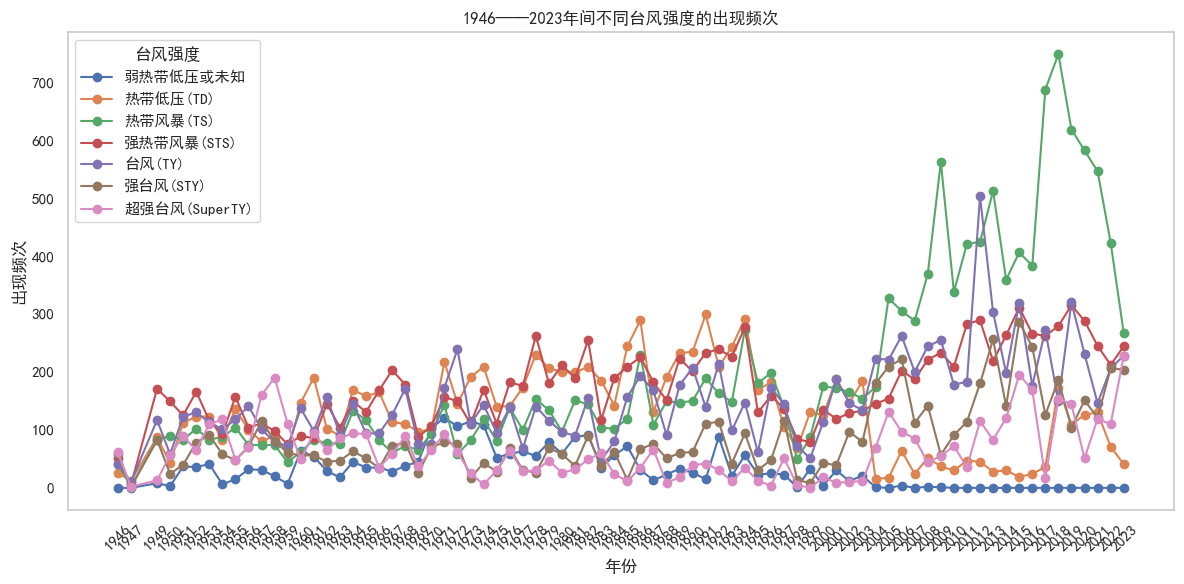

In [108]:
# 计算按年份统计不同台风强度的频数
frequency_by_year = df.groupby(['年份', '台风强度数值']).size().unstack(fill_value=0)

# 创建折线图
plt.figure(figsize=(12, 6))

for column in frequency_by_year.columns:
    plt.plot(frequency_by_year.index, frequency_by_year[column], marker='o', label=f'强度 {column}')

# 添加图例和标签
plt.title('1946——2023年间不同台风强度的出现频次')
plt.xlabel('年份')
plt.ylabel('出现频次')
plt.xticks(frequency_by_year.index, rotation=45)  # 旋转年份标签
plt.legend(title='台风强度', labels=['弱热带低压或未知', '热带低压(TD)', '热带风暴(TS)', '强热带风暴(STS)', '台风(TY)', '强台风(STY)', '超强台风(SuperTY)'])
plt.grid()

# 保存图像
plt.savefig('1946——2023年间不同台风强度的出现频次', dpi=600, bbox_inches='tight')  # 设置分辨率和边距
# 显示图形
plt.tight_layout()
plt.show()

In [109]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 使用 Seaborn 设置风格
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.2)

# 手动加载中文字体（这里以 SimHei 为例）
font_path = r'C:\Windows\Fonts\simhei.ttf'  # 请确保路径正确
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = font_prop.get_name()  # 设置全局字体

# 创建图表
plt.figure(figsize=(10, 6))
plt.plot(annual_typhoon_counts.index, annual_typhoon_counts.values, marker='o', color='#2B7A78',
         markersize=6, linewidth=2.5, label='台风总数')

# 设置标题和轴标签
plt.title('1946–2023年间台风总数变化趋势', fontsize=16, weight='bold', pad=20, fontproperties=font_prop)
plt.xlabel('年份', fontsize=14, weight='bold', fontproperties=font_prop)
plt.ylabel('台风总数', fontsize=14, weight='bold', fontproperties=font_prop)

# 显示网格
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout(pad=2.0)

# 保存图像
output_image_path = '1946–2023年台风总数变化趋势.png'
plt.savefig(output_image_path, dpi=600, bbox_inches='tight', format='png')  # 提高 DPI
plt.show()

NameError: name 'annual_typhoon_counts' is not defined

<Figure size 1000x600 with 0 Axes>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# 加载并选择特征
# 假设 df 包含台风强度、台风等级、风速、气压的列
X = df[['台风强度数值', '台风等级', '风速', '气压']]

# 标准化数据
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 肘部法则
inertia = []
k_values = range(2, 11)  # 设置 k 的范围为 2 到 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# 绘制肘部法则图
plt.figure(figsize=(8, 4))
plt.plot(k_values, inertia, marker='o', linestyle='-', color='b')
plt.title('肘部法则确定最优聚类数 k')
plt.xlabel('聚类数 k')
plt.ylabel('惯性 (Inertia)')
plt.grid(True)
# 保存图像
plt.savefig('肘部法则确定最优聚类数 k', dpi=600, bbox_inches='tight')  # 设置分辨率和边距
plt.show()

# 轮廓系数法
#silhouette_scores = []

#for k in k_values:
   # kmeans = KMeans(n_clusters=k, random_state=0)
   # labels = kmeans.fit_predict(X_scaled)
   # silhouette = silhouette_score(X_scaled, labels)
   # silhouette_scores.append(silhouette)

# 绘制轮廓系数图
#plt.figure(figsize=(8, 4))
#plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='r')
#plt.title('轮廓系数法确定最优聚类数 k')
#plt.xlabel('聚类数 k')
#plt.ylabel('轮廓系数 (Silhouette Score)')
#plt.grid(True)
#plt.show()

In [ ]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # 设置环境变量

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib.font_manager import FontProperties

# 假设 df 是你的原始数据
# 1. 按台风名称分组，对数值列进行聚合
df_aggregated = df.groupby('台风中文名称').agg({
    '风速': 'mean',
    '气压': 'mean',
    '台风强度数值': 'mean',
    '台风等级':'mean',
}).reset_index()

# 2. 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_aggregated[['风速', '气压', '台风强度数值', '台风等级']])

# 3. K-means 聚类
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++')
df_aggregated['Cluster'] = kmeans.fit_predict(X_scaled)

# 4. 可视化聚类结果
sns.set(style="whitegrid")

scatter = plt.scatter(df_aggregated['风速'], df_aggregated['气压'],
                      c=df_aggregated['Cluster'], cmap='viridis', alpha=0.6,
                      edgecolors='w', s=df_aggregated['台风等级'] * 5)

# 添加图例
handles, labels = scatter.legend_elements()
legend = plt.legend(handles, labels, title="Clusters", loc='upper right', fontsize=10)

# 添加标题和标签
plt.title("Typhoon Clustering Results", fontsize=14)
plt.xlabel("Wind Speed (m/s)", fontsize=12)
plt.ylabel("Pressure (hPa)", fontsize=12)

# 增加主要网格线
plt.grid(color='gray', linestyle='--', linewidth=0.7)
plt.savefig('Typhoon Clustering Results.png', dpi=600, bbox_inches='tight')  # 设置分辨率和边距
# 显示图形
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 假设 df 是包含所有台风数据的 DataFrame，并且有一个日期列可以用来筛选月份
# 先确保日期列是 datetime 类型
# df['当前台风时间'] = pd.to_datetime(df['当前台风时间'])

# 设置字体和负号
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来显示中文
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号


# 过滤出七月和九月的数据
july_typhoons = df[df['当前台风时间'].dt.month == 7]
september_typhoons = df[df['当前台风时间'].dt.month == 9]

# 对七月和九月的台风数据进行描述性统计分析
july_stats = july_typhoons[['风速', '气压', '台风强度数值']].describe()
september_stats = september_typhoons[['风速', '气压', '台风强度数值']].describe()
print("七月台风统计:")
july_stats

In [ ]:
# 创建一个 1x2 的子图
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# 绘制七月风速的箱型图
sns.boxplot(x=july_typhoons['风速'], ax=axes[0])
axes[0].set_title('七月台风风速箱型图', fontsize=14)
axes[0].set_xlabel('风速 (m/s)', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# 绘制七月气压的箱型图
sns.boxplot(x=july_typhoons['气压'], ax=axes[1])
axes[1].set_title('七月台风气压箱型图', fontsize=14)
axes[1].set_xlabel('气压 (hPa)', fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig('七月风速与气压箱型图.png', dpi=600, bbox_inches='tight')  # 设置分辨率和边距
plt.show()  # 显示图形

In [ ]:
# 创建一个 1x2 的子图
fig, axes = plt.subplots(1, 2, figsize=(14, 4))

# 绘制九月风速的箱型图
sns.boxplot(x=september_typhoons['风速'], ax=axes[0])
axes[0].set_title('九月台风风速箱型图', fontsize=14)
axes[0].set_xlabel('风速 (m/s)', fontsize=12)
axes[0].grid(axis='x', linestyle='--', alpha=0.7)

# 绘制九月气压的箱型图
sns.boxplot(x=september_typhoons['气压'], ax=axes[1])
axes[1].set_title('九月台风气压箱型图', fontsize=14)
axes[1].set_xlabel('气压 (hPa)', fontsize=12)
axes[1].grid(axis='x', linestyle='--', alpha=0.7)

# 调整布局
plt.tight_layout()

# 保存图像
plt.savefig('九月风速与气压箱型图.png', dpi=600, bbox_inches='tight')  # 设置分辨率和边距
plt.show()  # 显示图形

In [ ]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
# 过滤出七月份的台风数据
# 假设时间列名为 '当前台风时间'，且为 datetime 类型
df['当前台风时间'] = pd.to_datetime(df['当前台风时间'])
july_typhoons = df[(df['当前台风时间'].dt.month == 7) & (df['当前台风时间'].dt.year >= 2000) & (df['当前台风时间'].dt.year <= 2023)]

# 检查七月份历史台风数量
num_typhoons = july_typhoons['台风中文名称'].nunique()
print(f"七月份历史台风数量: {num_typhoons}")

In [117]:
# 绘制台风路径
plt.figure(figsize=(9, 5), dpi=300)  # 设置图像大小和分辨率
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([95, 180, 2, 58], crs=ccrs.PlateCarree())  # 设置经纬度范围
# 添加底图
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # 添加陆地
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # 添加海洋
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)  # 添加国家边界
ax.add_feature(cfeature.COASTLINE)  # 添加海岸线
ax.add_feature(cfeature.LAKES, alpha=0.5)  # 添加湖泊
ax.add_feature(cfeature.RIVERS)  # 添加河流
# 添加中国省份边界
shp_info = shpreader.Reader("C:\\Users\\z\\Downloads\\中华人民共和国\\中华人民共和国.shp")  # 替换为你的省界 shapefile 路径
ax.add_geometries(shp_info.geometries(), crs=ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8)
# 绘制台风路径
for name, group in july_typhoons.groupby('台风中文名称'):
    ax.plot(group['经度'], group['纬度'], marker='o', markersize=2, linestyle='-', label=name, alpha=0.7)
# 添加图例
plt.title('2000-2023年七月台风路径及途径省份', fontsize=14)
plt.xlabel('经度', fontsize=14)
plt.ylabel('纬度', fontsize=14)
plt.legend(title='台风中文名称', fontsize=2, loc='upper right', bbox_to_anchor=(1, 1))

# 保存图像
plt.savefig('七月台风路径及省份图.png', dpi=600, bbox_inches='tight')  # 设置分辨率和边距
plt.show()  # 显示图形

NameError: name 'ccrs' is not defined

<Figure size 2700x1500 with 0 Axes>

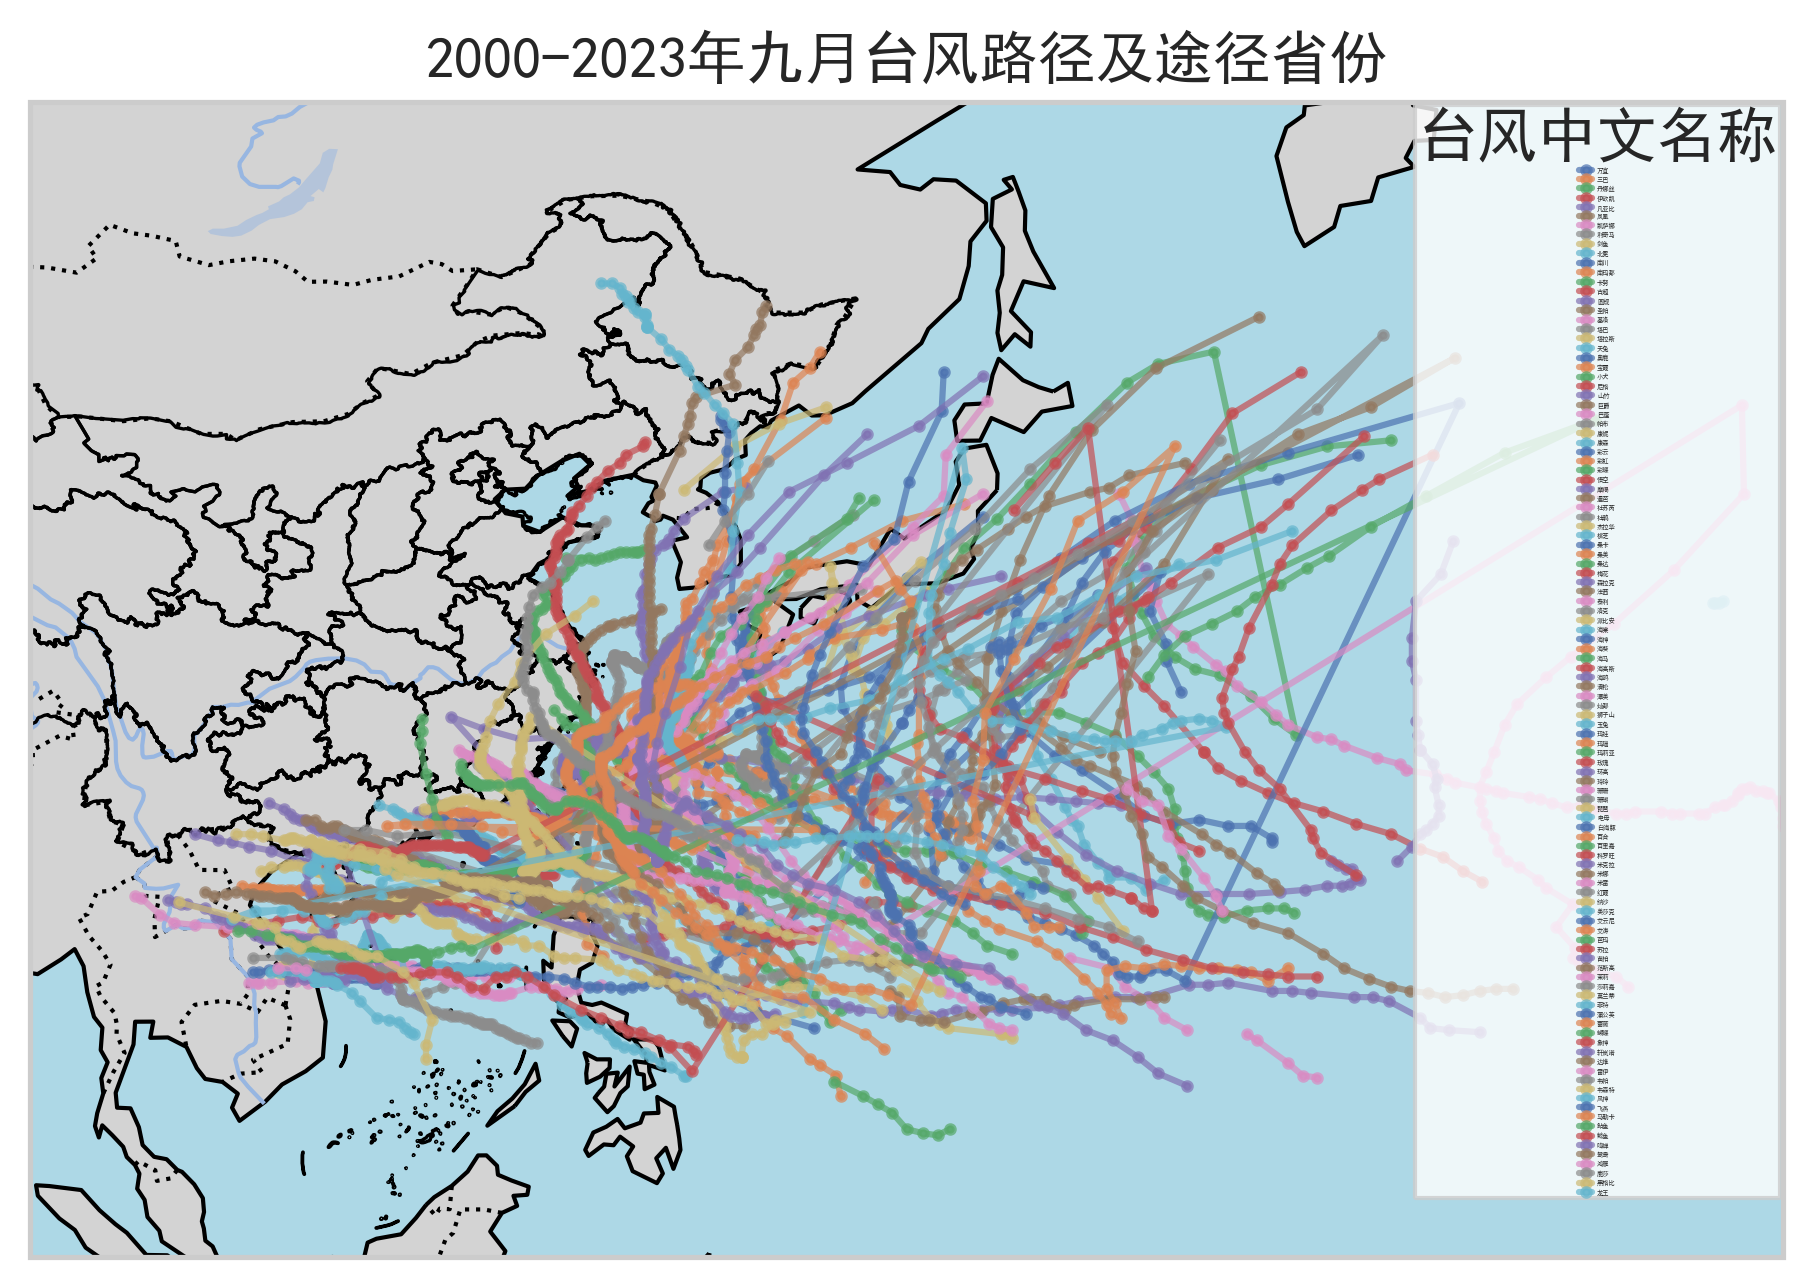

九月份历史台风数量: 110


In [119]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import pandas as pd

# 过滤出九月份的台风数据
# 假设时间列名为 '当前台风时间'，且为 datetime 类型
df['当前台风时间'] = pd.to_datetime(df['当前台风时间'])
september_typhoons = df[(df['当前台风时间'].dt.month == 9) & (df['当前台风时间'].dt.year >= 2000) & (df['当前台风时间'].dt.year <= 2023)]

# 绘制台风路径
plt.figure(figsize=(9, 5), dpi=300)  # 设置图像大小和分辨率
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([95, 180, 2, 58], crs=ccrs.PlateCarree())  # 设置经纬度范围

# 添加底图
ax.add_feature(cfeature.LAND, facecolor='lightgray')  # 添加陆地
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')  # 添加海洋
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1)  # 添加国家边界
ax.add_feature(cfeature.COASTLINE)  # 添加海岸线
ax.add_feature(cfeature.LAKES, alpha=0.5)  # 添加湖泊
ax.add_feature(cfeature.RIVERS)  # 添加河流

# 添加中国省份边界
shp_info = shpreader.Reader("C:\\Users\\z\\Downloads\\中华人民共和国\\中华人民共和国.shp")  # 替换为你的省界 shapefile 路径
ax.add_geometries(shp_info.geometries(), crs=ccrs.PlateCarree(), edgecolor='black', facecolor='none', linewidth=0.8)

# 绘制九月份台风路径
for name, group in september_typhoons.groupby('台风中文名称'):
    ax.plot(group['经度'], group['纬度'], marker='o', markersize=2, linestyle='-', label=name, alpha=0.7)  # 修改 markersize 为 2

# 添加图例
plt.title('2000-2023年九月台风路径及途径省份', fontsize=14)
plt.xlabel('经度', fontsize=14)
plt.ylabel('纬度', fontsize=14)
plt.legend(title='台风中文名称', fontsize=1.5, loc='upper right', bbox_to_anchor=(1, 1))

# 保存图像
plt.savefig('九月台风路径及途径省份省份.png', dpi=600, bbox_inches='tight')  # 设置分辨率和边距
plt.show()  # 显示图形

# 检查九月份历史台风数量
num_typhoons_september = september_typhoons['台风中文名称'].nunique()
print(f"九月份历史台风数量: {num_typhoons_september}")


In [120]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
from dbfread import DBF
# 读取 .dbf 文件
dbf_file_path = "C:\\Users\\z\\Downloads\\中华人民共和国\\中华人民共和国.dbf"
dbf_data = DBF(dbf_file_path, encoding='utf-8')  # 尝试使用 'gbk' 或 'gb2312'
# 将 dbf 数据转换为 DataFrame
province_df = pd.DataFrame(iter(dbf_data))
# 读取台风数据 DataFrame（确保已存在）
# 假设 df 包含经度和纬度，并且已经过滤了七月份的数据
df['当前台风时间'] = pd.to_datetime(df['当前台风时间'], errors='coerce')  # 转换为日期时间格式
july_typhoons = df[(df['当前台风时间'].dt.month == 7) & 
                   (df['当前台风时间'].dt.year >= 2000) & 
                   (df['当前台风时间'].dt.year <= 2023)]
# 创建 GeoDataFrame
geometry = [Point(xy) for xy in zip(july_typhoons['经度'], july_typhoons['纬度'])]
typhoon_gdf = gpd.GeoDataFrame(july_typhoons, geometry=geometry, crs="EPSG:4326")
# 读取省份 shapefile
shp_file_path = "C:\\Users\\z\\Downloads\\中华人民共和国\\中华人民共和国.shp"
provinces_gdf = gpd.read_file(shp_file_path)
# 检查并修复无效的几何图形
provinces_gdf['geometry'] = provinces_gdf.geometry.buffer(0)
# 将 DataFrame 中的名称列与 provinces_gdf 进行合并
provinces_gdf = provinces_gdf.merge(province_df[['adcode', 'name']], on='adcode', how='left')

# 统计台风登陆的省份
province_counts = {}
for _, typhoon in typhoon_gdf.iterrows():
    typhoon_geometry = typhoon.geometry
    for _, province in provinces_gdf.iterrows():
        if typhoon_geometry.within(province.geometry):
            province_name = province['name_y']  # 替换为实际的省份名称列
            province_counts[province_name] = province_counts.get(province_name, 0) + 1

# 将结果按降序排列
sorted_province_counts = sorted(province_counts.items(), key=lambda x: x[1], reverse=True)

# 提取省份和登陆次数
provinces, counts = zip(*sorted_province_counts)
provinces, counts

(('福建省',
  '广西壮族自治区',
  '广东省',
  '台湾省',
  '江苏省',
  '江西省',
  '海南省',
  '浙江省',
  '安徽省',
  '山东省',
  '河北省',
  '天津市',
  '辽宁省',
  '内蒙古自治区',
  '云南省',
  '',
  '香港特别行政区',
  '上海市'),
 (163, 122, 80, 73, 70, 64, 57, 31, 25, 24, 8, 6, 4, 4, 3, 1, 1, 1))

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib import font_manager
# 指定字体路径（根据实际字体文件位置替换路径）
font_path = "C:/Windows/Fonts/msyh.ttc"  # 微软雅黑字体路径
font_prop = font_manager.FontProperties(fname=font_path)

# 设置字体属性
rcParams['font.sans-serif'] = [font_prop.get_name()]  # 使用指定路径的字体
rcParams['axes.unicode_minus'] = False  # 解决坐标轴负号显示问题
# 使用 Seaborn 设置风格
sns.set_style("whitegrid")

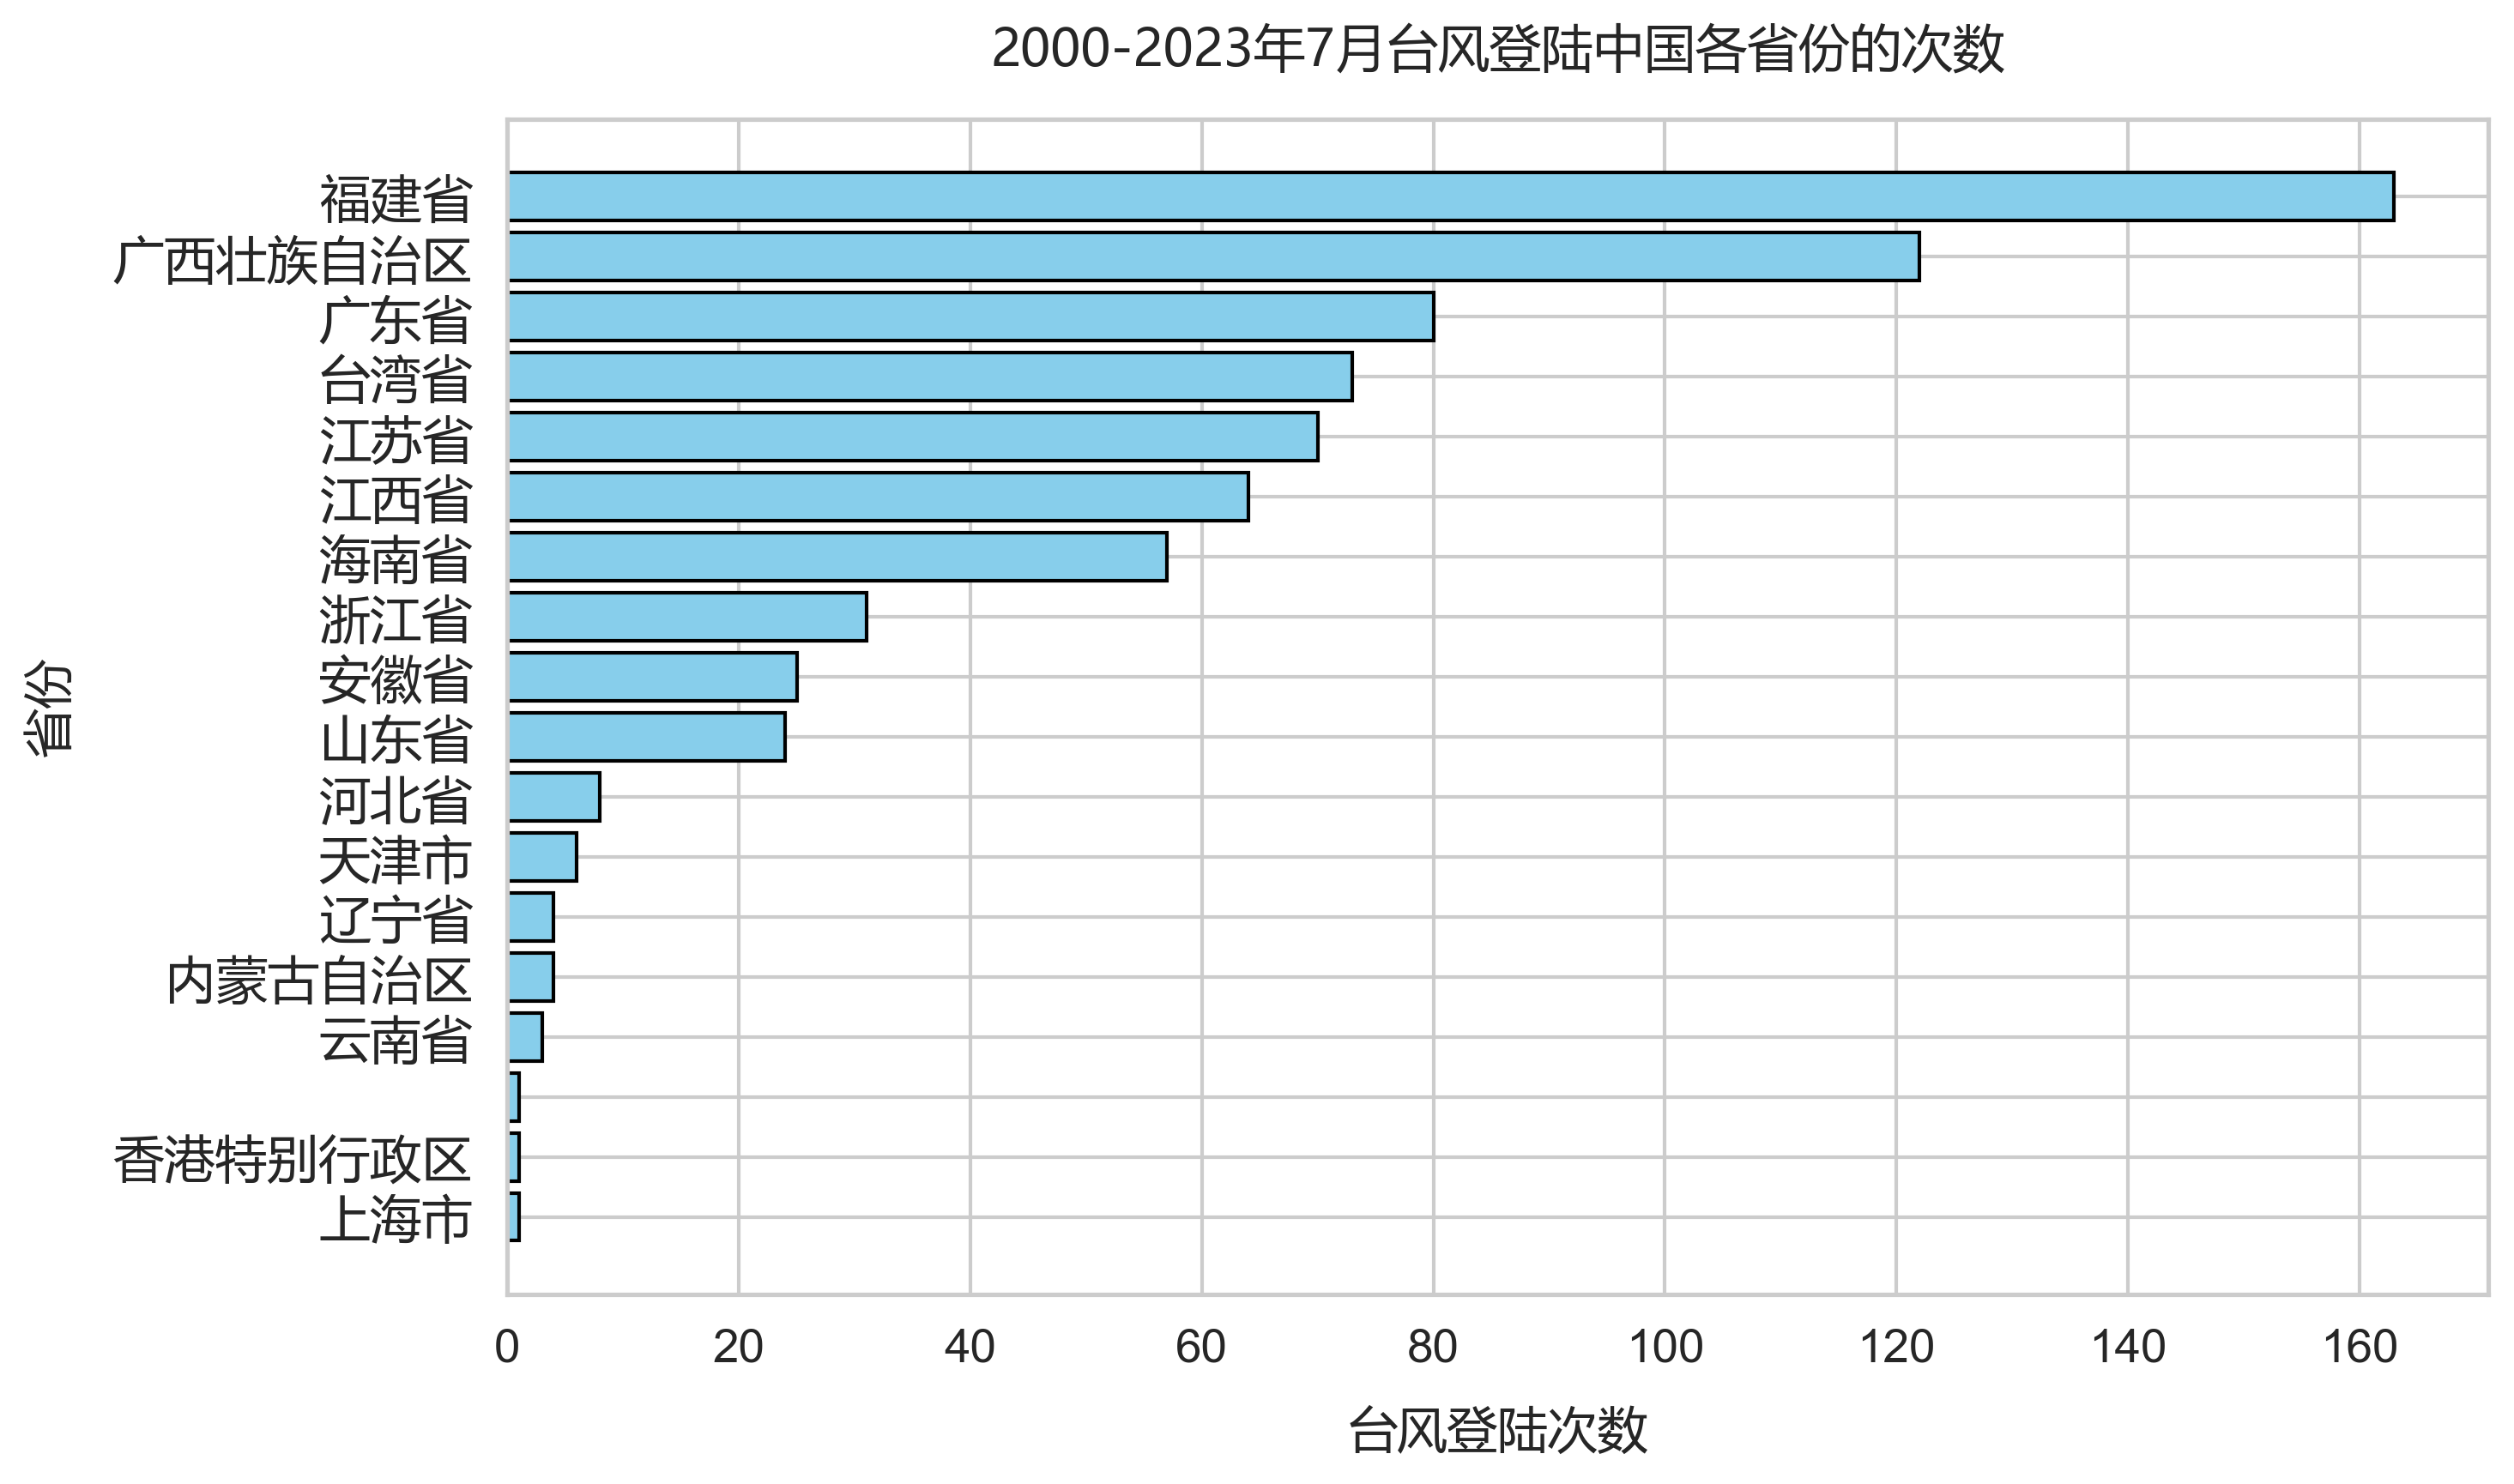

In [122]:
# 使用 Seaborn 设置风格
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
# 绘制条形图
bars = ax.barh(provinces, counts, color='skyblue', edgecolor='black')
ax.invert_yaxis()
# 添加标签和标题
ax.set_xlabel("台风登陆次数", fontsize=14, labelpad=10, fontproperties=font_prop)
ax.set_ylabel("省份", fontsize=14, labelpad=10, fontproperties=font_prop)
ax.set_title("2000-2023年7月台风登陆中国各省份的次数", fontsize=16, pad=15, fontproperties=font_prop)
# 强制设置 y 轴刻度标签
ax.set_yticks(range(len(provinces)))
ax.set_yticklabels(provinces, fontproperties=font_prop)
plt.tight_layout()
plt.savefig("2000-2023年7月台风登陆中国各省份的次数.png", format="png", dpi=600, bbox_inches='tight')
plt.show()

In [123]:
# 修改后的代码筛选九月的台风数据
# 读取 .dbf 文件
dbf_file_path = "C:\\Users\\z\\Downloads\\中华人民共和国\\中华人民共和国.dbf"
dbf_data = DBF(dbf_file_path, encoding='utf-8')  # 尝试使用 'gbk' 或 'gb2312'

# 将 dbf 数据转换为 DataFrame
province_df = pd.DataFrame(iter(dbf_data))

# 读取台风数据 DataFrame（确保已存在）
# 假设 df 包含经度和纬度，并且已经过滤了九月份的数据
df['当前台风时间'] = pd.to_datetime(df['当前台风时间'], errors='coerce')  # 转换为日期时间格式
september_typhoons = df[(df['当前台风时间'].dt.month == 9) & 
                        (df['当前台风时间'].dt.year >= 2000) & 
                        (df['当前台风时间'].dt.year <= 2023)]

# 创建 GeoDataFrame
geometry = [Point(xy) for xy in zip(september_typhoons['经度'], september_typhoons['纬度'])]
typhoon_gdf = gpd.GeoDataFrame(september_typhoons, geometry=geometry, crs="EPSG:4326")

# 读取省份 shapefile
shp_file_path = "C:\\Users\\z\\Downloads\\中华人民共和国\\中华人民共和国.shp"
provinces_gdf = gpd.read_file(shp_file_path)

# 检查并修复无效的几何图形
provinces_gdf['geometry'] = provinces_gdf.geometry.buffer(0)

# 将 DataFrame 中的名称列与 provinces_gdf 进行合并
provinces_gdf = provinces_gdf.merge(province_df[['adcode', 'name']], on='adcode', how='left')

# 统计台风登陆的省份
province_counts = {}
for _, typhoon in typhoon_gdf.iterrows():
    typhoon_geometry = typhoon.geometry
    for _, province in provinces_gdf.iterrows():
        if typhoon_geometry.within(province.geometry):
            province_name = province['name_y']  # 替换为实际的省份名称列
            province_counts[province_name] = province_counts.get(province_name, 0) + 1

# 将结果按降序排列
sorted_province_counts = sorted(province_counts.items(), key=lambda x: x[1], reverse=True)

# 提取省份和登陆次数
provinces, counts = zip(*sorted_province_counts)
provinces, counts

(('广东省',
  '福建省',
  '台湾省',
  '广西壮族自治区',
  '海南省',
  '浙江省',
  '江苏省',
  '黑龙江省',
  '吉林省',
  '江西省',
  '上海市',
  '山东省',
  '安徽省',
  '辽宁省',
  '内蒙古自治区',
  '',
  '湖南省',
  '云南省'),
 (122, 83, 74, 62, 56, 41, 34, 26, 14, 13, 10, 9, 7, 7, 5, 4, 1, 1))

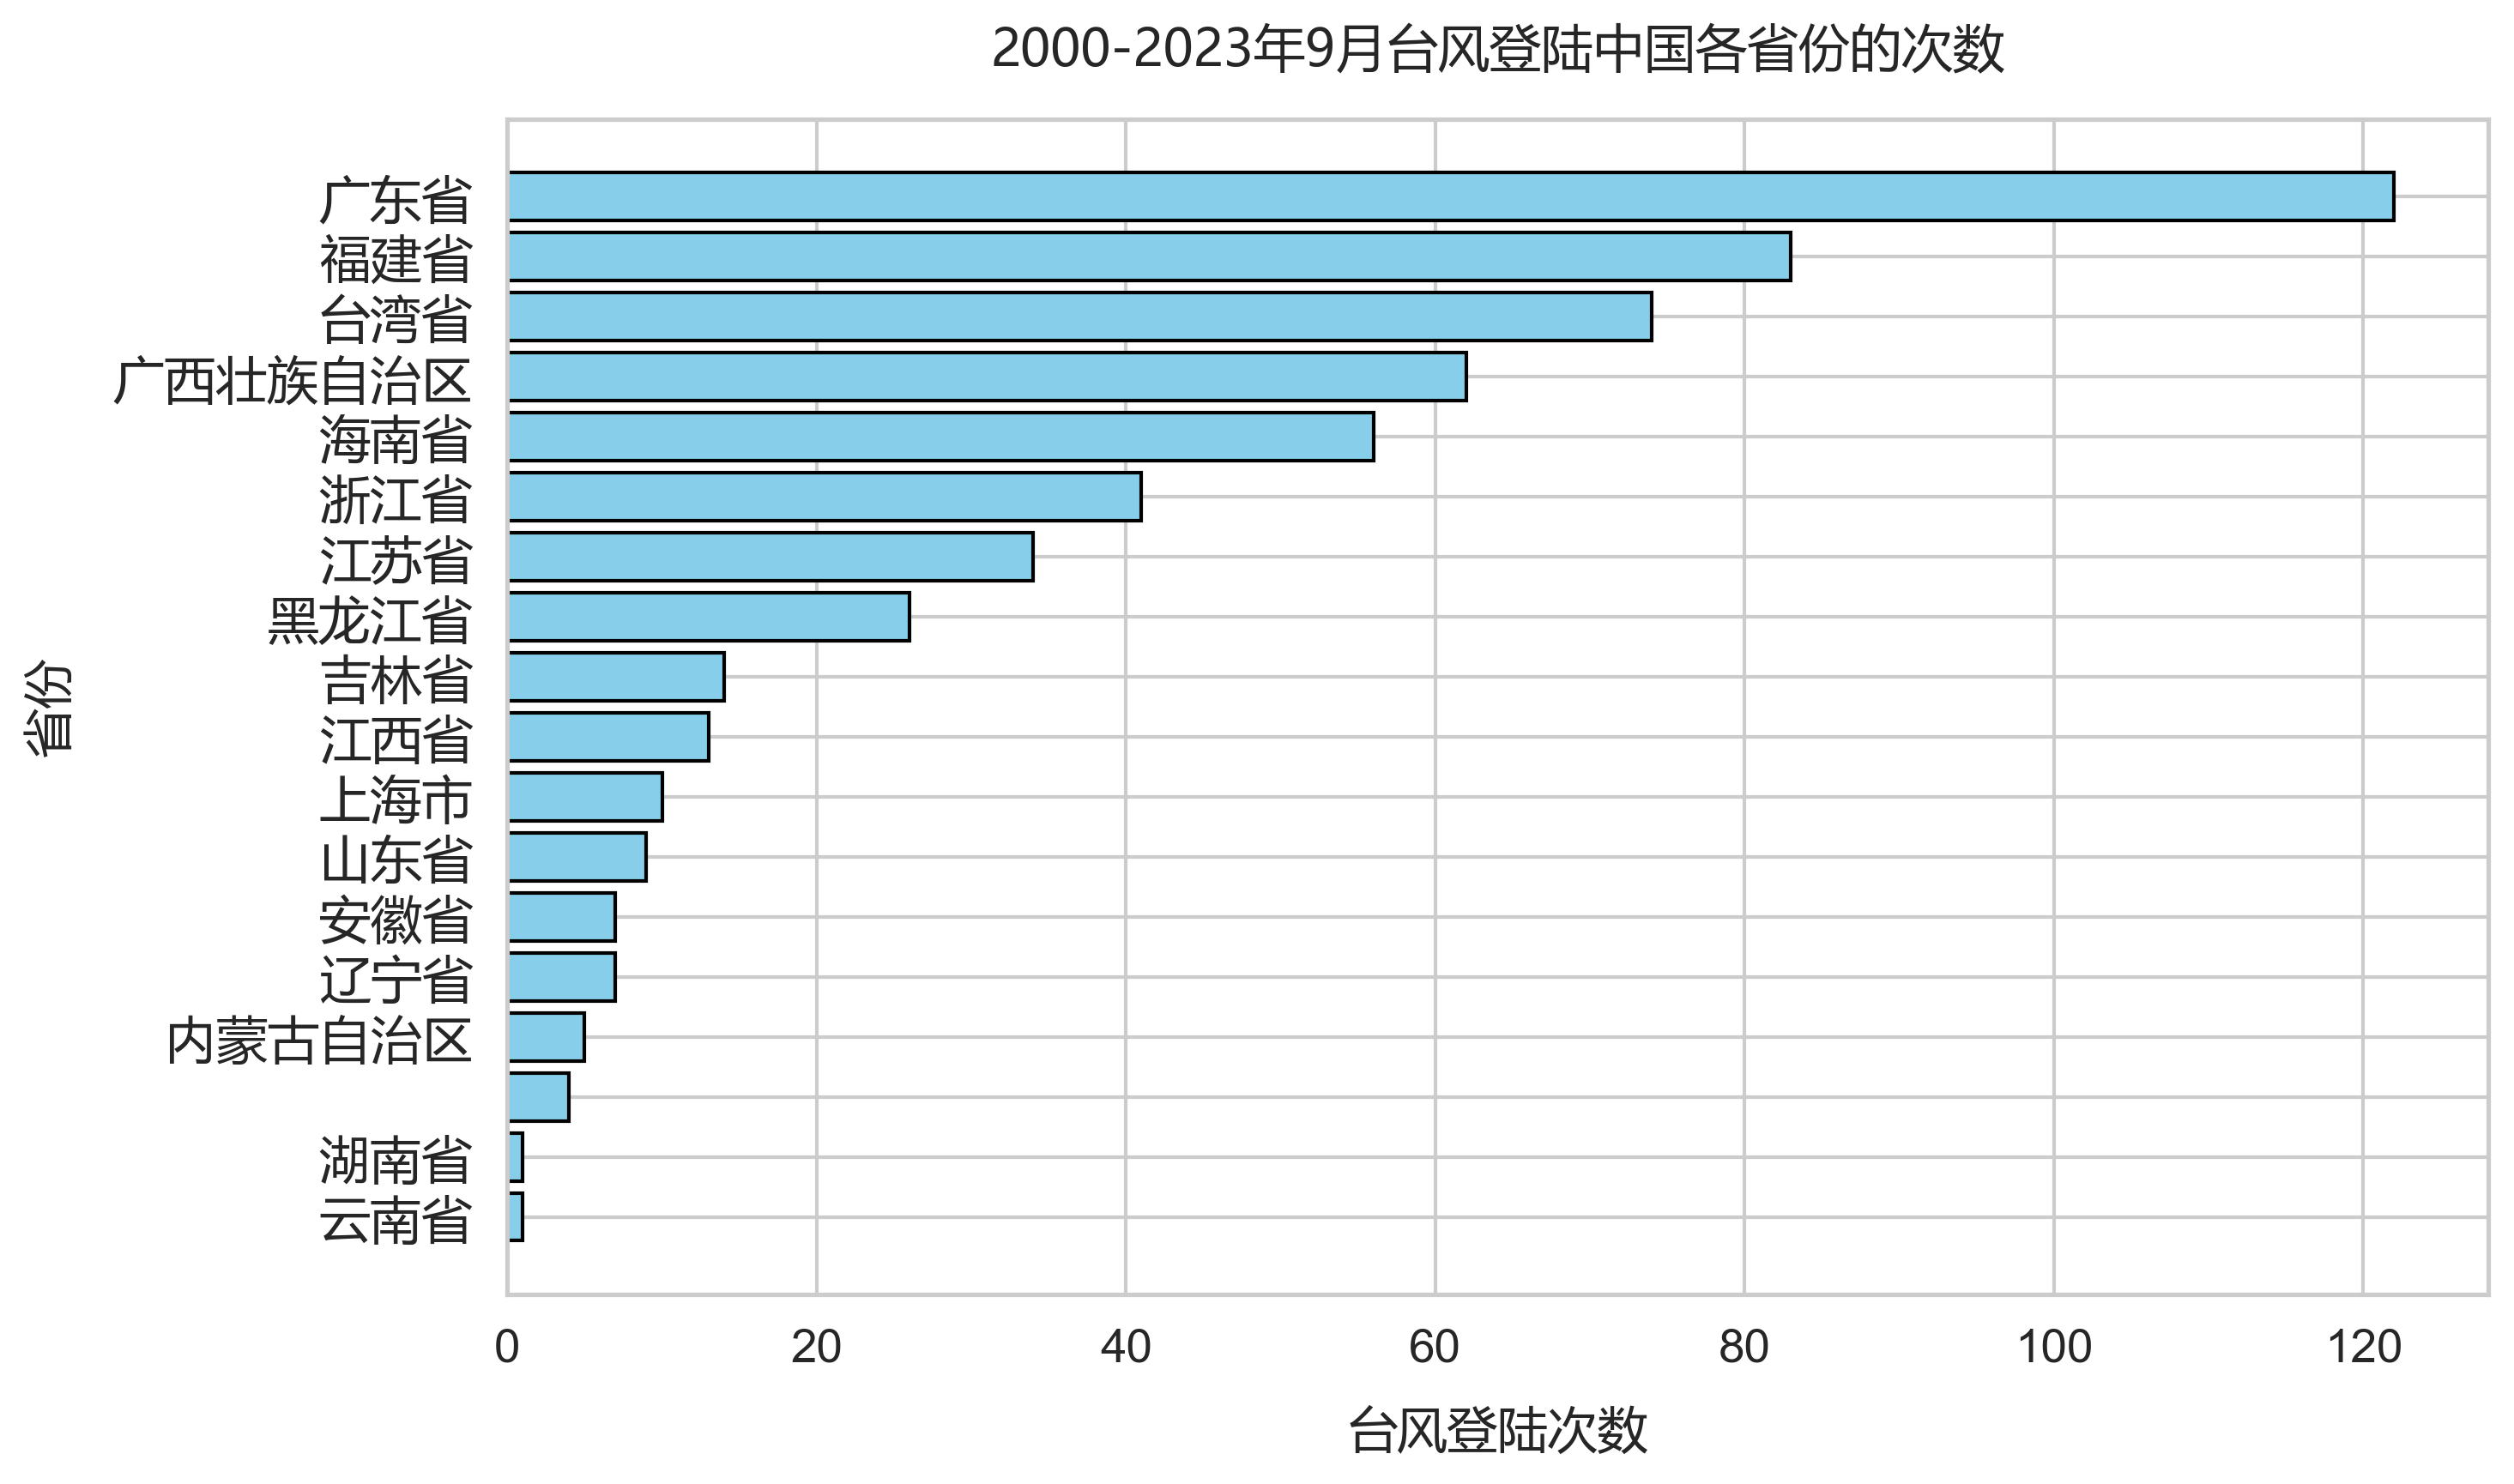

In [125]:
# 使用 Seaborn 设置风格
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(10, 6), dpi=300)
# 绘制条形图
bars = ax.barh(provinces, counts, color='skyblue', edgecolor='black')
ax.invert_yaxis()
# 添加标签和标题
ax.set_xlabel("台风登陆次数", fontsize=14, labelpad=10, fontproperties=font_prop)
ax.set_ylabel("省份", fontsize=14, labelpad=10, fontproperties=font_prop)
ax.set_title("2000-2023年9月台风登陆中国各省份的次数", fontsize=16, pad=15, fontproperties=font_prop)
# 强制设置 y 轴刻度标签
ax.set_yticks(range(len(provinces)))
ax.set_yticklabels(provinces, fontproperties=font_prop)
plt.tight_layout()
plt.savefig("2000-2023年9月台风登陆中国各省份的次数.png", format="png", dpi=600, bbox_inches='tight')
plt.show()

In [135]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from shapely.geometry import Point
import geopandas as gpd
from dbfread import DBF

# 设定环境变量
os.environ["OMP_NUM_THREADS"] = "1"

# 读取省份 shapefile
shp_file_path = "C:\\Users\\z\\Downloads\\中华人民共和国\\中华人民共和国.shp"
provinces_gdf = gpd.read_file(shp_file_path)
# 将 DataFrame 中的名称列与 provinces_gdf 进行合并
provinces_gdf = provinces_gdf.merge(province_df[['adcode', 'name']], on='adcode', how='left')
provinces_gdf['geometry'] = provinces_gdf.geometry.buffer(0)  # 检查并修复无效的几何图形

# 读取 .dbf 文件
dbf_file_path = "C:\\Users\\z\\Downloads\\中华人民共和国\\中华人民共和国.dbf"
dbf_data = DBF(dbf_file_path, encoding='utf-8')
province_df = pd.DataFrame(iter(dbf_data))

# 读取台风数据 DataFrame（假设 df 已存在并包含九月数据）
df['当前台风时间'] = pd.to_datetime(df['当前台风时间'], errors='coerce')
september_typhoons = df[(df['当前台风时间'].dt.month == 9) & 
                        (df['当前台风时间'].dt.year.between(2000, 2023))]

# 1. 按台风名称分组，对数值列进行聚合
df_aggregated = df.groupby('台风中文名称').agg({
    '风速': 'mean',
    '气压': 'mean',
    '台风强度数值': 'mean',
    '台风等级': 'mean',
}).reset_index()

# 2. 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_aggregated[['风速', '气压', '台风强度数值', '台风等级']])

# 3. K-means 聚类
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++')
df_aggregated['Cluster'] = kmeans.fit_predict(X_scaled)

# 4. 将聚类结果合并到九月份台风数据中
september_typhoons = september_typhoons.merge(df_aggregated[['台风中文名称', 'Cluster']], on='台风中文名称', how='left')

# 5. 统计每个聚类的途径省份
september_typhoons['途经省份'] = None

# 创建 GeoDataFrame
geometry = [Point(xy) for xy in zip(september_typhoons['经度'], september_typhoons['纬度'])]
typhoon_gdf = gpd.GeoDataFrame(september_typhoons, geometry=geometry, crs="EPSG:4326")


# 遍历每个台风
for name, group in typhoon_gdf.groupby('Cluster'):
    provinces_list = []
    
    for _, point in group.iterrows():
        point_geom = point.geometry
        
        for _, province in provinces_gdf.iterrows():
            if province.geometry.contains(point_geom):
                province_name = province['name_y']  # 确保使用省份名称列
                provinces_list.append(province_name)
    
    # 将结果添加到 DataFrame 中
    unique_provinces = list(set(provinces_list))
    # 过滤掉 None 值
    unique_provinces = [p for p in unique_provinces if p is not None]
    
    typhoon_gdf.loc[typhoon_gdf['Cluster'] == name, '途经省份'] = ", ".join(unique_provinces)

# 输出每个聚类的途经省份情况
print('九月夏台风不同类别途径省份情况')
cluster_provinces = typhoon_gdf.groupby('Cluster')['途经省份'].unique().reset_index()
print(cluster_provinces)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


九月夏台风不同类别途径省份情况
   Cluster                                               途经省份
0      0.0  [, 广西壮族自治区, 上海市, 广东省, 福建省, 云南省, 黑龙江省, 海南省, 浙江省...
1      1.0  [, 广西壮族自治区, 吉林省, 上海市, 辽宁省, 广东省, 福建省, 内蒙古自治区, 江...
2      2.0                 [广西壮族自治区, 广东省, 福建省, 湖南省, 江西省, 台湾省]


In [127]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from shapely.geometry import Point
import geopandas as gpd
from dbfread import DBF
# 设定环境变量
os.environ["OMP_NUM_THREADS"] = "1"
# 读取省份 shapefile
shp_file_path = "C:\\Users\\z\\Downloads\\中华人民共和国\\中华人民共和国.shp"
provinces_gdf = gpd.read_file(shp_file_path)
# 将 DataFrame 中的名称列与 provinces_gdf 进行合并
provinces_gdf = provinces_gdf.merge(province_df[['adcode', 'name']], on='adcode', how='left')
provinces_gdf['geometry'] = provinces_gdf.geometry.buffer(0)  # 检查并修复无效的几何图形
# 读取 .dbf 文件
dbf_file_path = "C:\\Users\\z\\Downloads\\中华人民共和国\\中华人民共和国.dbf"
dbf_data = DBF(dbf_file_path, encoding='utf-8')
province_df = pd.DataFrame(iter(dbf_data))
# 读取台风数据 DataFrame（假设 df 已存在并包含九月数据）
df['当前台风时间'] = pd.to_datetime(df['当前台风时间'], errors='coerce')
september_typhoons = df[(df['当前台风时间'].dt.month == 7) & 
                        (df['当前台风时间'].dt.year.between(2000, 2023))]
# 1. 按台风名称分组，对数值列进行聚合
df_aggregated = df.groupby('台风中文名称').agg({
    '风速': 'mean',
    '气压': 'mean',
    '台风强度数值': 'mean',
    '台风等级': 'mean',
}).reset_index()
# 2. 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_aggregated[['风速', '气压', '台风强度数值', '台风等级']])
# 3. K-means 聚类
kmeans = KMeans(n_clusters=3, random_state=42, init='k-means++')
df_aggregated['Cluster'] = kmeans.fit_predict(X_scaled)
# 4. 将聚类结果合并到九月份台风数据中
september_typhoons = september_typhoons.merge(df_aggregated[['台风中文名称', 'Cluster']], on='台风中文名称', how='left')
# 5. 统计每个聚类的途径省份
september_typhoons['途经省份'] = None
# 创建 GeoDataFrame
geometry = [Point(xy) for xy in zip(september_typhoons['经度'], september_typhoons['纬度'])]
typhoon_gdf = gpd.GeoDataFrame(september_typhoons, geometry=geometry, crs="EPSG:4326")
# 遍历每个台风
for name, group in typhoon_gdf.groupby('Cluster'):
    provinces_list = []
    
    for _, point in group.iterrows():
        point_geom = point.geometry
        
        for _, province in provinces_gdf.iterrows():
            if province.geometry.contains(point_geom):
                province_name = province['name_y']  # 确保使用省份名称列
                provinces_list.append(province_name)
    # 将结果添加到 DataFrame 中
    unique_provinces = list(set(provinces_list))
    # 过滤掉 None 值
    unique_provinces = [p for p in unique_provinces if p is not None]  
    typhoon_gdf.loc[typhoon_gdf['Cluster'] == name, '途经省份'] = ", ".join(unique_provinces)
# 输出每个聚类的途经省份情况
cluster_provinces = typhoon_gdf.groupby('Cluster')['途经省份'].unique().reset_index()
print('七月夏台风不同类别途径省份情况')
print(cluster_provinces)

D:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


七月夏台风不同类别途径省份情况
   Cluster                                               途经省份
0      0.0  [, 广西壮族自治区, 上海市, 河北省, 辽宁省, 福建省, 广东省, 天津市, 内蒙古自...
1      1.0  [广西壮族自治区, 河北省, 广东省, 福建省, 云南省, 江苏省, 海南省, 浙江省, 江...
2      2.0            [广西壮族自治区, 广东省, 福建省, 云南省, 海南省, 江西省, 台湾省]


——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————
——————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————